# Basis eksempel - hente CSV fra SSB til pandas
## Enkel figur basert på et lite datasett fra SSBs API:ferdige datasett
### Henter [sesongjustert detaljomsetningsindeks](https://data.ssb.no/api/v0/dataset/1066) som CSV 


In [1]:
# Importerer Python Pandas for å kunne lage dataframe
import pandas as pd
import numpy as np

API2 Get url med utformat csv2

In [2]:
url = "https://data.ssb.no/api/pxwebapi/v2-beta/tables/07129/data?valueCodes[NACE]=47&valueCodes[ContentsCode]=VolumSesong&valueCodes[Tid]=top(13)&outputformat=csv2"

pd.read_csv() henter innholdet fra API-et og legger det i data. 
De norske datasettene i csv2 er separert med komma og punktum som desimaltegn.
CSV er ikke UTF-8, så vi må angi parameter for encoding for å få ÆØÅ riktig. 

In [3]:
data = pd.read_csv(url, encoding = "ISO-8859-1")

Sjekker at datatypen er Pandas dataframe

In [4]:
type(data)

pandas.core.frame.DataFrame

Shape gir antall rader (13) og kolonner (4)

In [5]:
data.shape

(13, 4)

Toppen av datasettet. Verdikolonnen har tittelen på uttrekket.

In [6]:
data.head()

,næring,måned,statistikkvariabel,"07129: Varehandelsindeksen,"
0,"47 Detaljhandel, unntatt salg av motorvogner",2023M11,"Volumindeks, sesongjustert",92.7
1,"47 Detaljhandel, unntatt salg av motorvogner",2023M12,"Volumindeks, sesongjustert",92.1
2,"47 Detaljhandel, unntatt salg av motorvogner",2024M01,"Volumindeks, sesongjustert",92.1
3,"47 Detaljhandel, unntatt salg av motorvogner",2024M02,"Volumindeks, sesongjustert",92.2
4,"47 Detaljhandel, unntatt salg av motorvogner",2024M03,"Volumindeks, sesongjustert",92.6


Endrer til datoformat ved først å erstatte M med - . Ikke strengt nødvendig. Ta vekk kommentaren og kjør på nytt. Hva er endringen i figurene?

Informasjon om innholdet i dataframe

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   næring                       13 non-null     object 
 1   måned                        13 non-null     object 
 2   statistikkvariabel           13 non-null     object 
 3   07129: Varehandelsindeksen,  13 non-null     float64
dtypes: float64(1), object(3)
memory usage: 548.0+ bytes


In [8]:
print(data.columns)

Index(['næring', 'måned', 'statistikkvariabel', '07129: Varehandelsindeksen,'], dtype='object')


Setter tittel

In [9]:
tittel = data.columns[3] + ' ' + data['statistikkvariabel'].iloc[0] + ', ' + data['næring'].iloc[0] + ', ' + data['måned'].iloc[0] + '-' + data['måned'].iloc[-1]

Alternativ: ersatt M med - og sett tid. Kommenter ut cellen over og ta vekk kommentarene under

In [10]:
# data['måned']= pd.to_datetime(data['måned'].str.replace('M', '-'))

In [11]:
# tittel = data.columns[3] + ' ' + data['næring'].iloc[0] + ', ' + data['statistikkvariabel'].iloc[0] + ', ' + data['måned'].iloc[0].strftime('%YM%m') + '-' + data['måned'].iloc[-1].strftime('%YM%m')
# print(tittel)

Setter måned som index-kolonne

Lage et linjediagram der vi angir x og y aksen

<Axes: title={'center': '07129: Varehandelsindeksen, Volumindeks, sesongjustert, 47 Detaljhandel, unntatt salg av motorvogner, 2023M11-2024M11'}, xlabel='måned'>

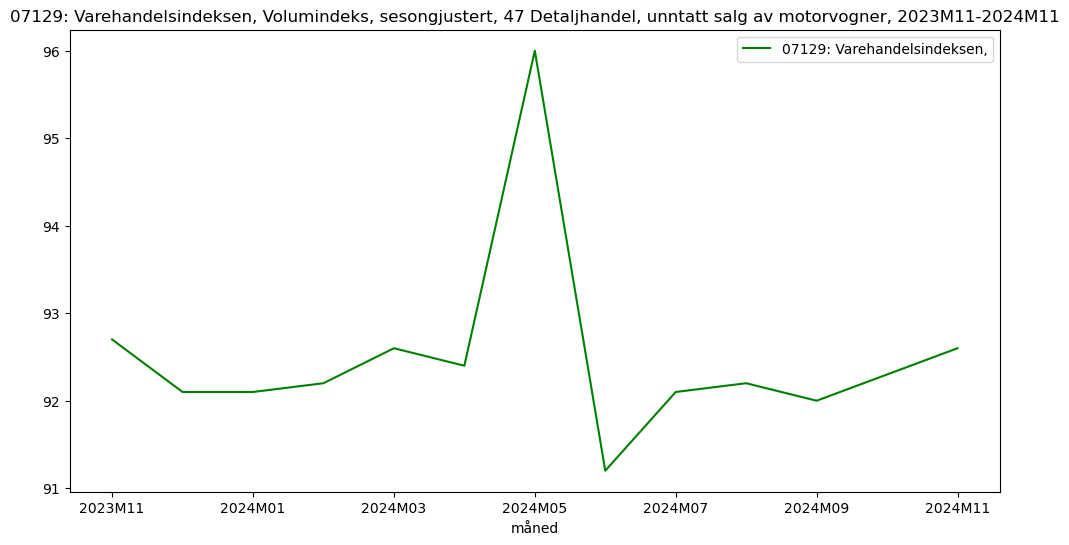

In [12]:
data.plot(x='måned', y='07129: Varehandelsindeksen,', figsize=(12, 6), color ='g', title = tittel)

*Alternativ*: Legger index (måned) og verdier  til et serie objekt, data_serie.

*Informasjon*: Fram til 2021 var dette en egen svært enkel indeks fra SSB, Detaljomsetningsindeksen. Den var fin for enkle eksempler. I 2022 ble Detaljomsetningindeksen utvidet med flere næringsgrupper (45 og 46) og detaljert med undergupper. Navnet på Statistikkbanktabellen ble endret til Varehandelsindeksen. Selve datasettet, 1066, er ikke endret.  